Proyecto 1 - Data Science
Gian Paolo Robelo 20230117

Preguntas:

¿Que relación tiene el millaje (odometer) con el precio del vehículo?
¿Cómo se comparan los precios entre estados?
¿Cómo se relaciona el tipo de carrocería (body) con los niveles de precios?
¿Qué marcas se presentan en mejor condición?
¿Cuáles modelos se presentan con mayor millaje?
¿Cuáles marcas se presentan con menor millaje?
¿Qué modelo presenta la mayor variedad de trims?
¿La transmisión tiene relación con el millaje y condición del vehículo?
¿Cuáles marcas venden una mayor variedad de vehículos?
¿Qué relación hay entre el año de manufactura y el tipo de transmisión?


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Read the data from the CSV file
df = pd.read_csv('car_prices.csv')

# Limpiar y preparar datos
print("\nLimpieza de datos")
# Eliminar filas con valores nulos en columnas clave
df_clean = df.dropna(subset=['make', 'model', 'body', 'odometer', 'sellingprice', 'transmission'])
print(f"Filas después de limpiar: {len(df_clean)}")


Limpieza de datos
Filas después de limpiar: 482295


Pregunta 1: ¿Que relación tiene el millaje (odometer) con el precio del vehículo?

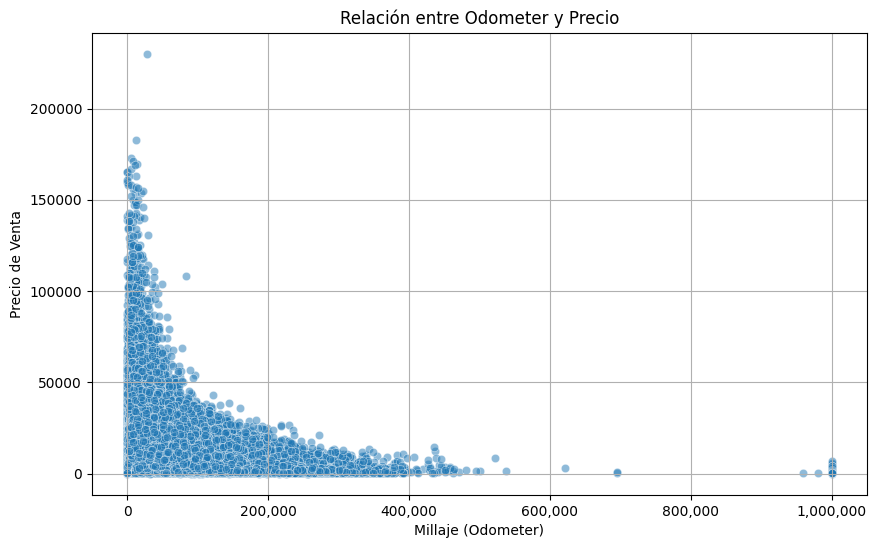

In [43]:


# Graficar la relación entre millaje y precio de venta
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='odometer', y='sellingprice', alpha=0.5)
plt.title('Relación entre Odometer y Precio')
plt.xlabel('Millaje (Odometer)')
plt.ylabel('Precio de Venta')
plt.grid()

# Formatear el eje X para mostrar números enteros
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()


Pregunta 2: ¿Cómo se comparan los precios entre estados?

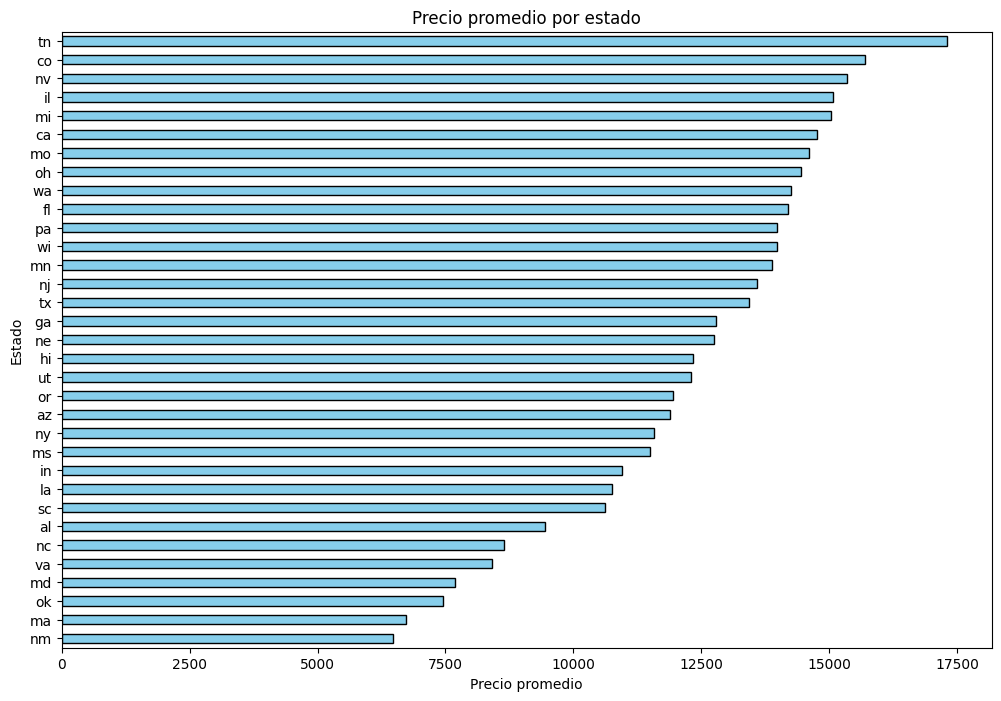

In [44]:
# Filtrar estados válidos (usando abreviaturas estándar de EE.UU.)
valid_states = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
df_clean = df_clean[df_clean['state'].str.upper().isin(valid_states)]


plt.figure(figsize=(12, 8))
states_avg_price = df_clean.groupby('state')['sellingprice'].mean().sort_values()
states_avg_price.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Precio promedio por estado')
plt.xlabel('Precio promedio')
plt.ylabel('Estado')
plt.show()

Pregunta 3: ¿Cómo se relaciona el tipo de carrocería (body) con los niveles de precios?

Filas después de limpiar: 405169


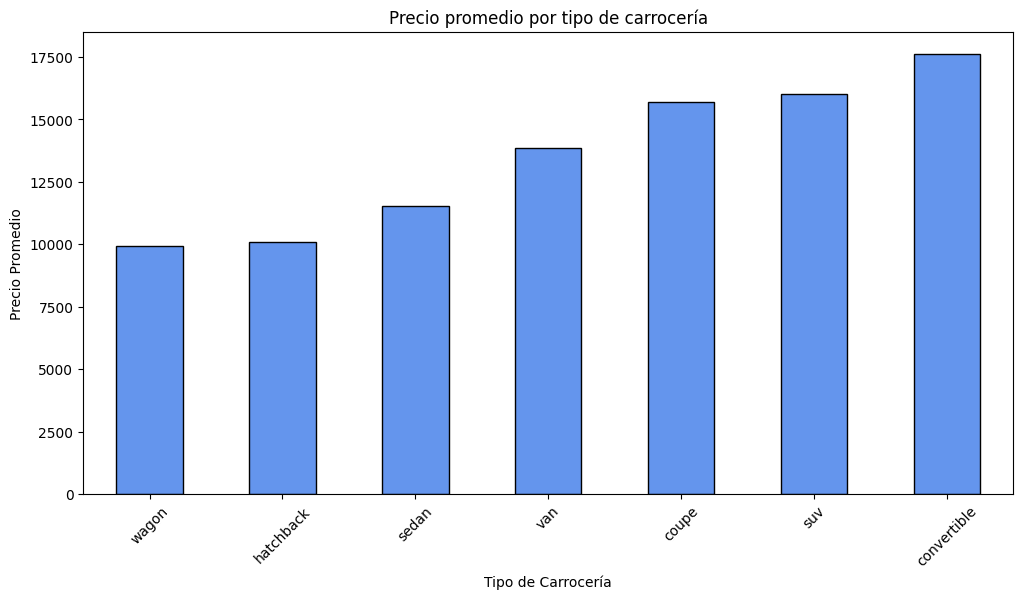

In [45]:
# Normalizar los valores en la columna 'body' para evitar repeticiones
df_clean['body'] = df_clean['body'].str.strip().str.lower()

# Filtrar los tipos de carrocería comunes
common_bodies = ['suv', 'sedan', 'truck', 'coupe', 'convertible', 'hatchback', 'van', 'wagon']
df_clean = df_clean[df_clean['body'].isin(common_bodies)]
print(f"Filas después de limpiar: {len(df_clean)}")

# Calcular el precio promedio por tipo de carrocería y graficar
plt.figure(figsize=(12, 6))
body_avg_price = df_clean.groupby('body')['sellingprice'].mean().sort_values()
body_avg_price.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Precio promedio por tipo de carrocería')
plt.xlabel('Tipo de Carrocería')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.show()


Pregunta 4: ¿Qué marcas se presentan en mejor condición?

In [46]:
best_condition = df_clean.groupby('make')['condition'].mean().sort_values(ascending=False).head(10)
# Obtener las marcas con mejor condición
best_condition_df = best_condition.reset_index()
best_condition_df.columns = ['make', 'average_condition']  # Renombrar las columnas para mayor claridad

print("Top 10 marcas en mejor condición:")
print(best_condition_df)


Top 10 marcas en mejor condición:
           make  average_condition
0   Lamborghini          43.666667
1         smart          37.885294
2  Aston Martin          37.291667
3       Ferrari          36.882353
4       Porsche          35.128028
5        Fisker          35.111111
6   Rolls-Royce          35.058824
7         Tesla          34.956522
8          MINI          34.787487
9       Bentley          34.590476


Pregunta 5: ¿Cuáles modelos se presentan con mayor millaje?

In [47]:
high_odometer = df_clean.groupby('model')['odometer'].mean().sort_values(ascending=False).head(10)
# Obtener los modelos con mayor millaje
high_odometer_df = high_odometer.reset_index()
high_odometer_df.columns = ['model', 'average_odometer']  # Renombrar las columnas para mayor claridad

print("Modelos con mayor millaje:")
print(high_odometer_df)


Modelos con mayor millaje:
            model  average_odometer
0           Paseo     338382.000000
1       400-Class     225623.000000
2          LX 450     210052.500000
3             960     208225.833333
4          Legend     200834.777778
5  Sprinter Cargo     194875.407407
6           E-150     194581.666667
7             J30     191908.000000
8           Metro     190301.000000
9   Civic del Sol     190155.000000


Pregunta 6: ¿Cuáles marcas se presentan con menor millaje?

In [48]:
low_odometer = df_clean.groupby('make')['odometer'].mean().sort_values().head(10)
# Obtener las marcas con menor millaje
low_odometer_df = low_odometer.reset_index()
low_odometer_df.columns = ['make', 'average_odometer']  # Renombrar las columnas para mayor claridad

print("Marcas con menor millaje:")
print(low_odometer_df)


Marcas con menor millaje:
           make  average_odometer
0   Rolls-Royce      13824.117647
1       Ferrari      15639.588235
2   Lamborghini      15785.333333
3         Lotus      16932.000000
4         Tesla      17307.913043
5        Fisker      18165.666667
6  Aston Martin      23966.833333
7          FIAT      25752.761644
8         smart      28839.250729
9      Maserati      32707.333333


Pregunta 7: ¿Qué modelo presenta la mayor variedad de trims?

In [49]:
trim_variety = df_clean.groupby('model')['trim'].nunique().sort_values(ascending=False).head(10)
trim_variety_df = trim_variety.reset_index()
print("Modelos con mayor variedad de trims:")
print(trim_variety_df)


Modelos con mayor variedad de trims:
        model  trim
0       Jetta    44
1      Passat    37
2    3 Series    30
3     C-Class    30
4     E-Class    29
5  New Beetle    28
6      Accord    27
7     Impreza    25
8       Focus    25
9      Legacy    24


Pregunta 8: ¿La transmisión tiene relación con el millaje y condición del vehículo?

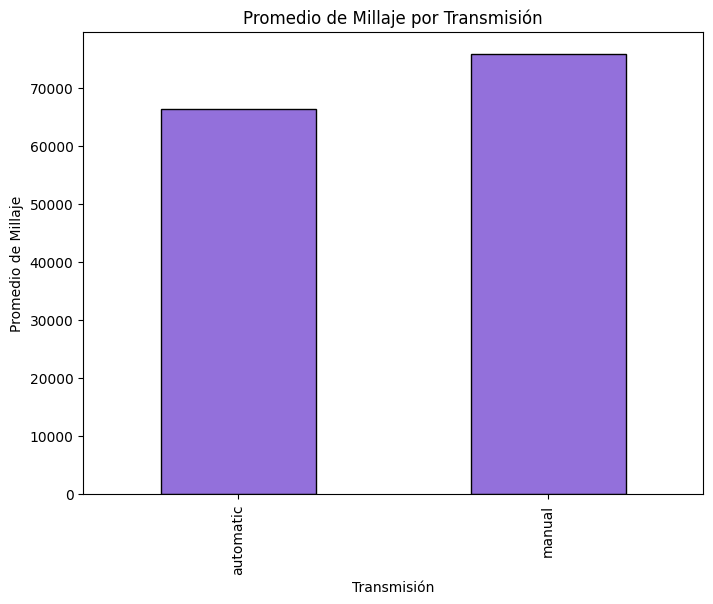

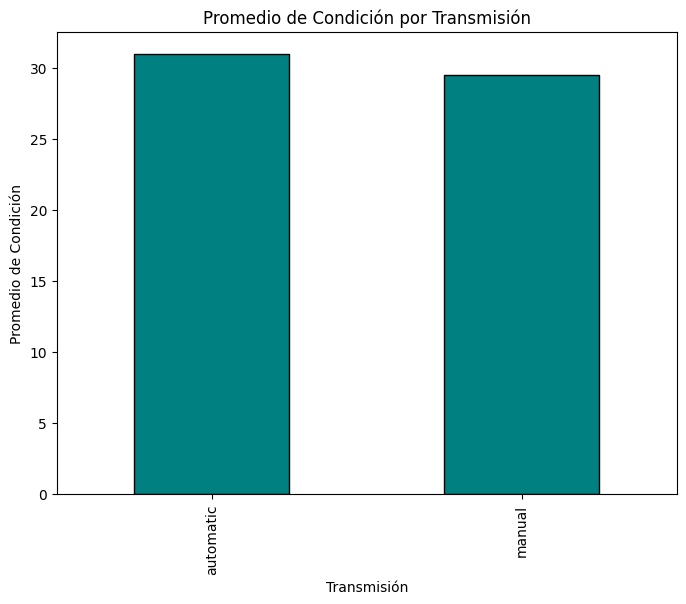

In [50]:
# 8. Promedio de millaje por transmisión
transmission_avg_odometer = df_clean.groupby('transmission')['odometer'].mean()
plt.figure(figsize=(8, 6))
transmission_avg_odometer.plot(kind='bar', color='mediumpurple', edgecolor='black')
plt.title('Promedio de Millaje por Transmisión')
plt.xlabel('Transmisión')
plt.ylabel('Promedio de Millaje')
plt.show()

# Promedio de condición por transmisión
transmission_avg_condition = df_clean.groupby('transmission')['condition'].mean()
plt.figure(figsize=(8, 6))
transmission_avg_condition.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Promedio de Condición por Transmisión')
plt.xlabel('Transmisión')
plt.ylabel('Promedio de Condición')
plt.show()

Pregunta 9: ¿Cuáles marcas venden una mayor variedad de vehículos?

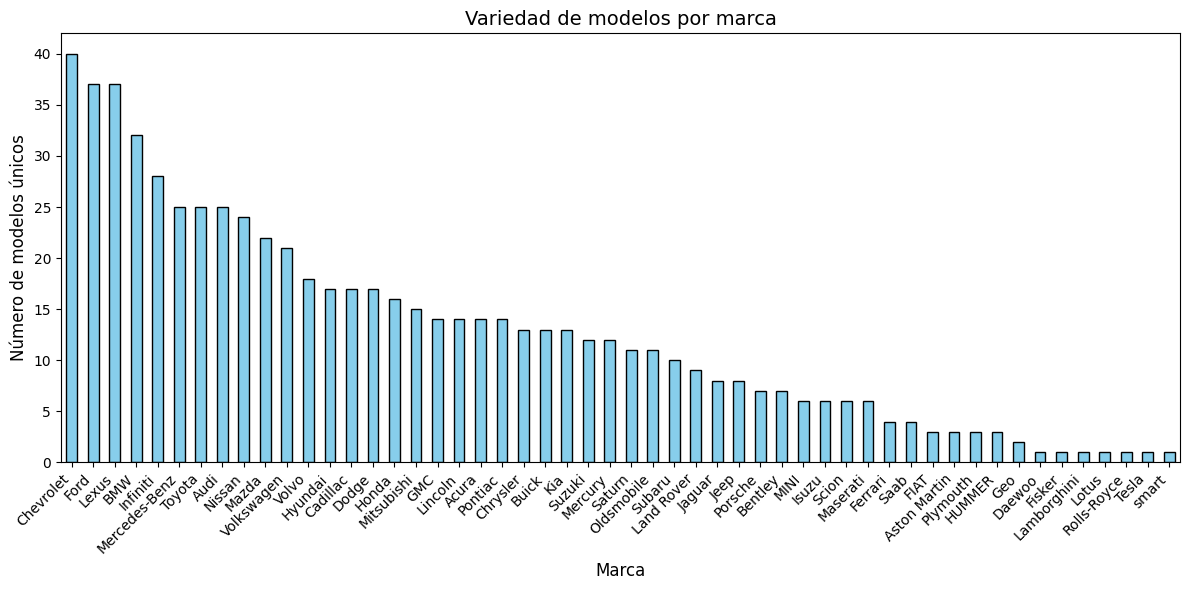

In [51]:
# Calcular el número de modelos únicos por marca
modelos_por_marca = df_clean.groupby("make")["model"].nunique().sort_values(ascending=False)

# Crear una gráfica de barras para mostrar la cantidad de modelos únicos por marca
plt.figure(figsize=(12, 6))
modelos_por_marca.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Variedad de modelos por marca", fontsize=14)
plt.ylabel("Número de modelos únicos", fontsize=12)
plt.xlabel("Marca", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Pregunta 10: ¿Qué relación hay entre el año de manufactura y el tipo de transmisión?

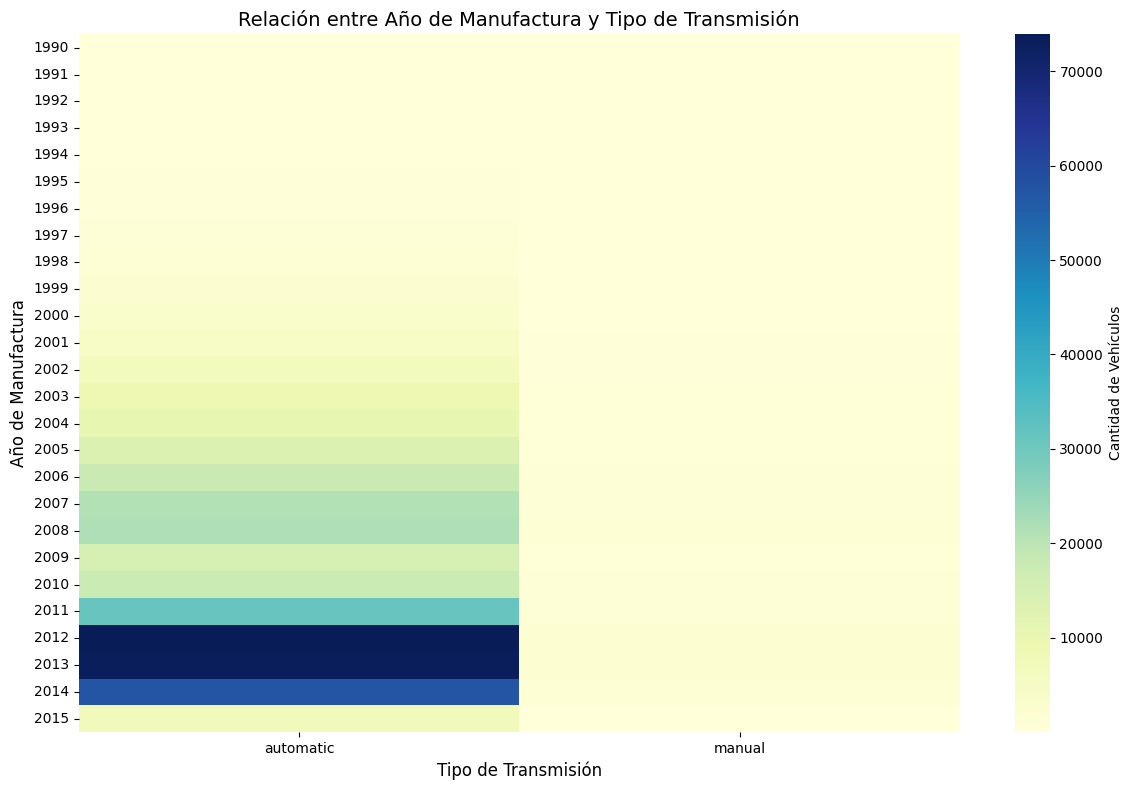

In [52]:
# Calcular la cantidad de vehículos por año y tipo de transmisión
transmision_año = df_clean.groupby(["year", "transmission"]).size().unstack(fill_value=0)

# Crear un mapa de calor para visualizar la relación
plt.figure(figsize=(12, 8))
sns.heatmap(transmision_año, cmap="YlGnBu", annot=False, cbar_kws={'label': 'Cantidad de Vehículos'})
plt.title("Relación entre Año de Manufactura y Tipo de Transmisión", fontsize=14)
plt.xlabel("Tipo de Transmisión", fontsize=12)
plt.ylabel("Año de Manufactura", fontsize=12)
plt.tight_layout()
plt.show()